# <center>Práctica 1</center>
** <center>Introduction to digital image processing</center> **


### I. Reading, writing and viewing images

In this notebook we are going to be using 3 python lybraries commonly used for image processing:

    -OpenCV: Open Source Computer Vision Library
    -Numpy: The fundamental package for scientific computing with Python
    -Matplotlib: a Python 2D plotting library
The first thing we are going to do is import these libraries:

In [2]:
#importamos librerías necesarias
import numpy as np
import cv2
from matplotlib import pyplot as plt


Now we are going to read an image using the finction imread from OpenCV. Youcan find information about it's arguments and output in this link:
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html

It's important to make sure that the image we are trying to read is in the correct directory. If the image is no found python won't raise an exception, imread will return a null array.

(Try using print to see your matrix)

In [4]:
imgcolor = cv2.imread('lena.jpg') #no 2nd argument needed becouse color is the default
imggris = cv2.imread('lena.jpg',0) #when 2nd argument is 0 imread returns a grey image

print(imggris)

[[187 196 187 ... 144 147 149]
 [188 193 188 ... 146 144 144]
 [190 189 190 ... 146 145 144]
 ...
 [163 164 170 ...  71  70  73]
 [159 164 168 ...  69  68  74]
 [152 163 167 ...  72  71  81]]


To learn more about the image we just read we can use the functios size, shape, dtype. 
To learn more about the type of matrices go to this link:
https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html

In [5]:
# Returns number of rows, colums and dimension
print('shape:')
print(imgcolor.shape)
print(imggris.shape)

# Returns number of pixels
print('size:')
print(imgcolor.size)
print(imggris.size)

# Tpe of matrix
print('type:')
print(imgcolor.dtype)
print(imggris.dtype)

shape:
(512, 512, 3)
(512, 512)
size:
786432
262144
type:
uint8
uint8


To view the image there are two options: opencv and matplotlib.
The opencv versoin opens the image in a separate window and requires the function waitKey to work. To close the windows you can use the function destroy all windows. For more information go to:
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html


In [6]:
#OpenCV

cv2.imshow('image',imgcolor)
cv2.waitKey(0)
cv2.destroyAllWindows()


The other option to view images is also imshow but on matplotlib, This option allows the image to appear directly on the notebook. To see the different parameters go to the nest link:
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html

Try to view the color image.

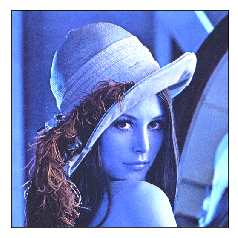

In [7]:

plt.imshow(imgcolor)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
plt.show()

As we can see the color image is not coorect, this is bacause of the color space used on OpenCV. OpenCV reads color images as BGR (Blue Green Red), whereas matplotlib represents RGB (Red Green Blue). To see the image correctly is necessary to change color spaces.


#### Functions to change color spaces

OpenCV has a function that changes that allows you to change the color space of an image it's **cvtcolor**. This function has a lot of possible transformations as you can see executing the next cell:


In [8]:
flags = flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

Let's use the color image whe have loades as an example. We want to change it from BGR to RGB so matplotlib can show the image correcty

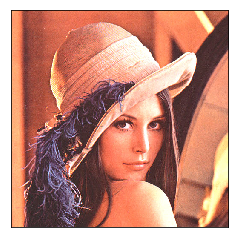

In [9]:
imgRGB = cv2.cvtColor(imgcolor, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.xticks([]), plt.yticks([])
plt.show()

**Transform agrey scale image to binary**

To go from a color image to gray we can just read de image as a una dimension image as we did in previously using cvtcolor with the argument COLOR_RGB2GRAY also works.
To gofrom gray to binary we will use de function Threshold, the documentation for this function is in the next link: 
https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=threshold#cv2.threshold

When choosing the intensity level for the threshold is important to now what you are going to use this binary image for. This threshold can be chosen manually but there are also algorithms designed to find the best possible thrshold, for example Otsu, these algorithms are also possible arguments for the Threshold function.

It is also important to choose the maxvalue best suited for your image. Normally binary images use the values 0 and 1, so the max value should be 1. 


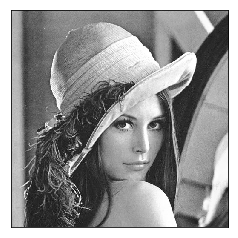

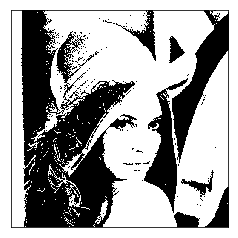

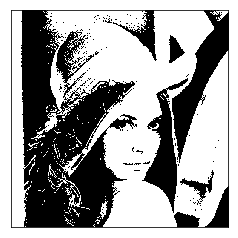

132.0


In [13]:
imggray = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
plt.imshow(imggray, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

[thresh, imgbi] = cv2.threshold(imggris, 127, 1, cv2.THRESH_BINARY) #with maxvalue 1
plt.imshow(imgbi, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

[thresh, imgotsu] = cv2.threshold(imggris, 127, 1, cv2.THRESH_OTSU)
plt.imshow(imgotsu, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()
print(thresh)

**From binary to color image**


Una imagen binaria pasa a ser RGB. Construya manualmente el mapa de color, de modo que los píxeles blancos de la imagen binaria (denominados píxeles de primer plano)tengan color rojo, y los píxeles oscuros de la imagen binaria tengan color amarillo. Páginas de información sobre mapas de color:
https://matplotlib.org/api/_as_gen/matplotlib.colors.Colormap.html#matplotlib.colors.Colormap
https://matplotlib.org/tutorials/colors/colormap-manipulation.html
Función para crear un mapa de color: https://matplotlib.org/api/_as_gen/matplotlib.colors.ListedColormap.html#matplotlib.colors.ListedColormap

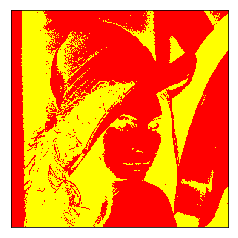

In [15]:
from matplotlib import colors as mpc
color = [[1, 1, 0],
       [1, 0, 0]]

newcmp = mpc.ListedColormap(color)
plt.imshow(imgbi, cmap = newcmp)
plt.xticks([]), plt.yticks([])
plt.show()

**Una imagen RGB pase a una imagen indexada con 255 niveles.**

**Una imagen RGB pase a indexada con 5 niveles.**

**Una imagen de grises pase a imagen indexada con 5 niveles.**

Las imágenes procesadas con OpenCV se pueden almacenar en disco utilizando el comando
imwrite. 

In [21]:
cv2.imwrite('lenagray.png',imggray)
cv2.imwrite('lenabinary.png', imgbi)

plt.imsave('lenaind.png', imgbi, cmap = newcmp)
#imgind = cv2.imread('cutieind.jpg')


**II. Modificación de la resolución espacial y en intensidad **

Para modificar la resolución espacial de una imagen usaremos la función resize, cuyos parámetros se pueden ver en el siguiente link: https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#void%20resize(InputArray%20src,%20OutputArray%20dst,%20Size%20dsize,%20double%20fx,%20double%20fy,%20int%20interpolation)

Redimensionar la imagen de Lena a 256x256 píxeles. 
Redimensionar la imagen de Lena a 128x128 píxeles. 

(256, 256)


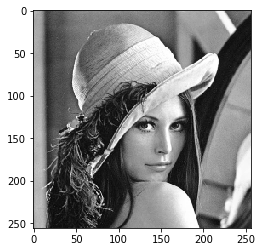

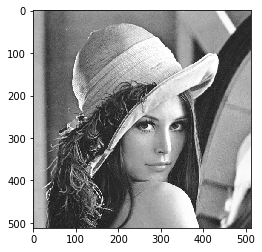

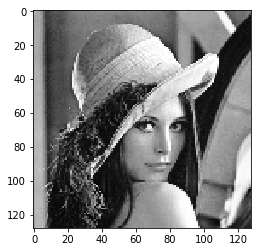

(128, 128)


In [31]:
Lena_256 = cv2.resize(imggray, None, fx=0.5, fy=0.5)
print(Lena_256.shape)

plt.imshow(Lena_256, cmap = 'gray')
plt.show()
plt.imshow(imggray, cmap = 'gray') #pintamos la original para apreciar la diferencia de calidad
plt.show()

Lena_128 = cv2.resize(imggray, None, fx=0.25, fy=0.25)
plt.imshow(Lena_128, cmap = 'gray')
plt.show()
print(Lena_128.shape)

In [1]:
cv2.imshow('original',imggray)
cv2.imshow('256',Lena_256)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

Utilice la imagen de menor resolución espacial obtenida anteriormente para crear otra
imagen del mismo tamaño que la imagen original usando diferentes interpolaciones.

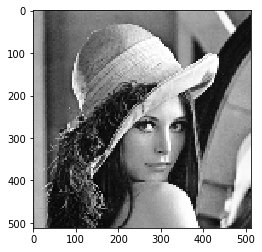

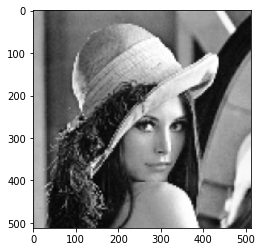

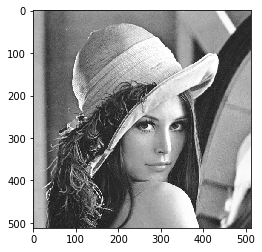

In [34]:
Lena_512a = cv2.resize(Lena_128, None, fx=4, fy=4, interpolation = cv2.INTER_NEAREST)

plt.imshow(Lena_512a, cmap = 'gray')
plt.show()

Lena_512b = cv2.resize(Lena_128, None, fx=4, fy=4) #No hace falta especificar bilineal ya que es la que está por defecto

plt.imshow(Lena_512b, cmap = 'gray')
plt.show()

plt.imshow(imggray, cmap = 'gray')
plt.show()

In [35]:
cv2.imshow('original',imggray)
cv2.imshow('a',Lena_512a)
cv2.imshow('b',Lena_512b)
cv2.waitKey(0)
cv2.destroyAllWindows()

Como sabe, la calidad de una imagen también depende del número de niveles de intensidad utilizados (resolución en intensidad). Explique cómo se puede reducir el número de niveles utilizando alguno de los comandos presentados en esta práctica. Indique las instrucciones necesarias para:
-reducir a 16, 4 y 2 el número de niveles de intensidad de la imagen 'Lena_512.tif', almacenando el resultado en las variables Lena_512_16, Lena_512_4 y Lena_512_2, respectivamente.
-visualizar las variables anteriores, incluyendo en la figura un texto que explique la imagen representada.

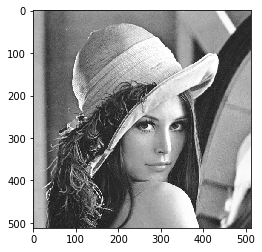

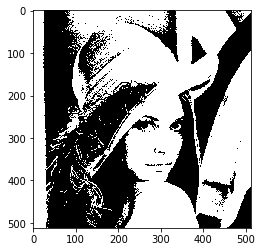

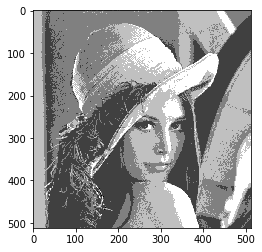

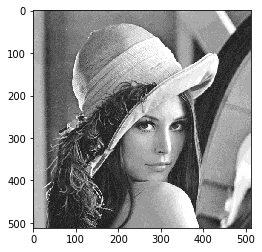

In [17]:
plt.imshow(imggray, cmap = 'gray')
plt.show()

#para reducir a 2 nieles vale con usar threshold
Lena_512_2 = imgotsu
plt.imshow(Lena_512_2, cmap = 'gray')
plt.show()

#Para reducir a 4 niveles
temp = imggray/64
temp = np.around(temp)
Lena_512_4 = temp*64

plt.imshow(Lena_512_4, cmap = 'gray')
plt.show()

#Para reducir a 16 niveles
temp = imggray/16
temp = np.around(temp)
Lena_512_16 = temp*16
plt.imshow(Lena_512_16, cmap = 'gray')
plt.show()

**III. Histograma y mejora de contraste**

https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html

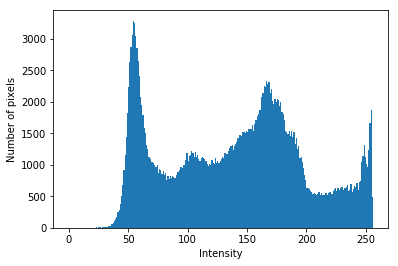

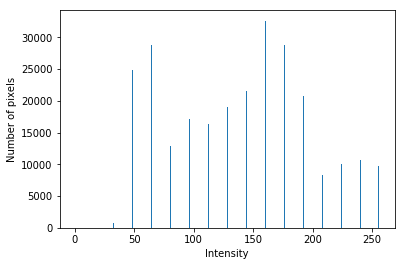

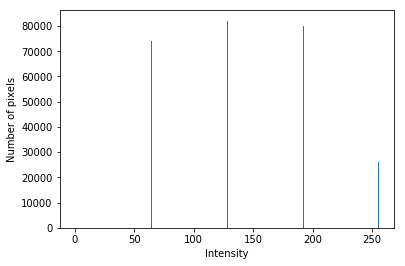

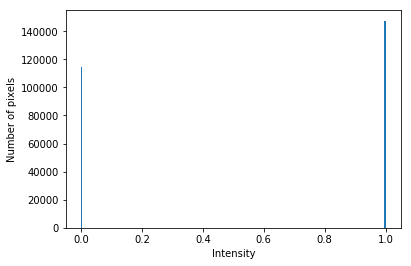

In [21]:
plt.hist(imggray.ravel(),256,[0,256]); 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()
plt.hist(Lena_512_16.ravel(),256,[0,256]);
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()
plt.hist(Lena_512_4.ravel(),256,[0,256]); 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()
plt.hist(Lena_512_2.ravel(),255,[0,1]); #In this case the range changes being a binary image
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()

Ecualizar el histograma usando la función equalizehist:
https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html?highlight=equalizehist

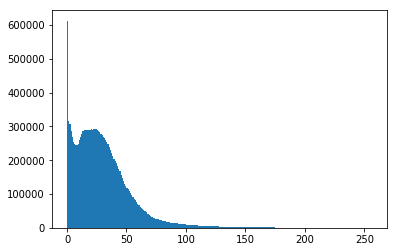

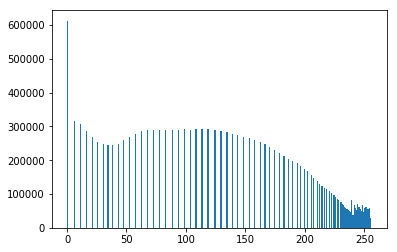

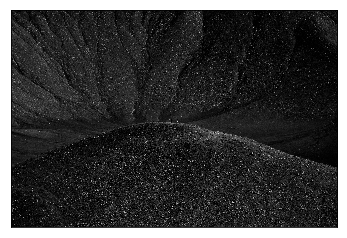

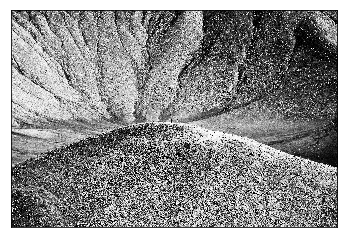

In [46]:
pout = cv2.imread('aerial.jpg', 0)
plt.hist(pout.ravel(),256,[0,256]); plt.show()
equ = cv2.equalizeHist(pout)
plt.hist(equ.ravel(),256,[0,256]); plt.show()

plt.imshow(pout, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(equ, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()



**IV.Interpretación del color y transformaciones puntuales**


uint8
(801, 1297, 3)


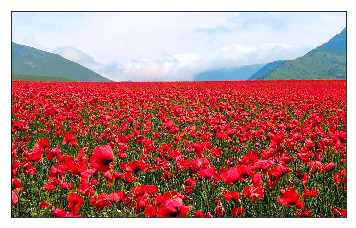

In [37]:
tulips = cv2.imread('tulips.jpg')

print(tulips.dtype)
print(tulips.shape)
tulipsRGB = cv2.cvtColor(tulips, cv2.COLOR_BGR2RGB)
plt.imshow(tulipsRGB)
plt.xticks([]), plt.yticks([])
plt.show()

Obtener el histograma de cada componente R, G, B. Analice y justifique las diferencias
entre los histogramas

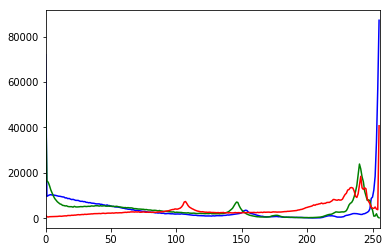

In [38]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([tulips],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Obtener el negativo de la componente roja y, con ella, volver a componer una imagen RGB y visualizar el resultado. Justifique los cambios de color respecto a la imagen original teniendo en cuenta el modelo de mezcla de colores correspondiente (modelo aditivo).

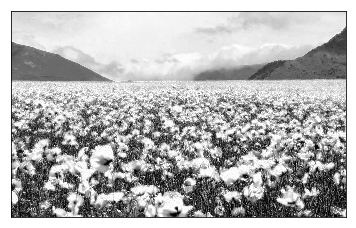

In [39]:
B,G,R = cv2.split(tulips)
plt.imshow(R, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()


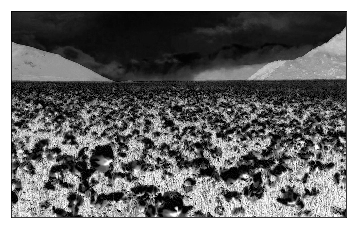

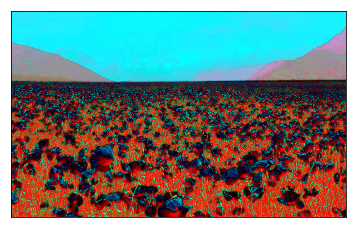

In [40]:
Rinv = 255-R
plt.imshow(Rinv, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

tulipsRGBinv = cv2.merge((Rinv,G,B))
plt.imshow(tulipsRGBinv)
plt.xticks([]), plt.yticks([])
plt.show()

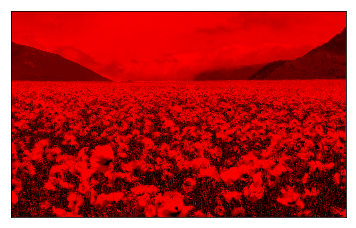

In [41]:
Bnew = np.zeros((801, 1297), np.uint8)
Gnew = np.zeros((801, 1297), np.uint8)
tulipsRGBred = cv2.merge((R,Gnew,Bnew))

plt.imshow(tulipsRGBred)
plt.xticks([]), plt.yticks([])
plt.show()